## Scalable Database 

### Group Id : 3

### Name :  Pooja, Patel
### Snehal Vilas, Rode
### Rishika Rachel, Manda

In [1]:
# imporing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import sqlite3 as sqllt
import plotly.express as px

# importing created packages 
import dataoperation as dop
import dataAnalysis as ana
import dataCleaning as cln

### Loading csv data to Pandas dataframe

In [2]:
# structure dataset
data_2017=pd.read_csv('dataset/2017.csv')

data_2018 = pd.read_csv('dataset/2018.csv')

data_2019=pd.read_csv('dataset/2019.csv')

# unstructure dataset
data_2020 = pd.read_json('dataset/2020.json')

In [3]:
# quick view of dataset
data_2019

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

###  2. Check the Data Types of your data columns

In [4]:
# infor of each dataframe 
print(data_2020.info())
print(data_2019.info())
print(data_2018.info())
print(data_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

## Data Cleaning 

### 3. Drop any NULL, missing values or unwanted columns.

In [5]:
# calling dataCleaning packages and checkAnyNullValues using function
cln.dataCleaning.checkAnyNullValues(df=data_2017)

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [6]:
cln.dataCleaning.checkAnyNullValues(df=data_2018)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [7]:
cln.dataCleaning.checkAnyNullValues(df=data_2019)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [8]:
cln.dataCleaning.checkAnyNullValues(df=data_2020)

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [9]:
# droping null values 
data_2018=data_2018.dropna()

In [10]:
# check null values 
cln.dataCleaning.checkAnyNullValues(df=data_2018)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Data Preparation

### Merge dataset, Rename Columns and Add Year column to Dataset and dropping unnessary column


In [11]:
# droping unnecessary columns of dataframe
data_2017=data_2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'],axis=1)

# droping unnecessary columns 
data_2020 = data_2020.drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'], axis=1)

In [12]:
# renaming the important columns 
data_2017=data_2017.rename(columns={"Happiness.Rank": "Happiness rank", "Happiness.Score": "Happiness Score","Economy..GDP.per.Capita.":"GDP per capita","Health..Life.Expectancy.":"Healthy life expectancy","Freedom":"Freedom to make life choices","Generosity":"Generosity","Trust..Government.Corruption.":"Perceptions of corruption","Family":"Social support"})

data_2018=data_2018.rename(columns={"Overall rank": "Happiness rank", "Score": "Happiness Score","GDP per capita":"GDP per capita","Healthy life expectancy":"Healthy life expectancy","Freedom to make life choices":"Freedom to make life choices","Generosity":"Generosity","Trust..Government.Corruption.":"Perceptions of corruption","Country or region":"Country"})

data_2019=data_2019.rename(columns={"Overall rank": "Happiness rank", "Score": "Happiness Score","GDP per capita":"GDP per capita","Healthy life expectancy":"Healthy life expectancy","Freedom to make life choices":"Freedom to make life choices","Generosity":"Generosity","Perceptions of corruption":"Perceptions of corruption","Country or region":"Country"})


data_2020['Happiness rank'] = data_2020.index + 1
data_2020_rename_cols_dict = {'Country name': 'Country', 'Ladder score' : 'Happiness Score', 
              'Explained by: Log GDP per capita': 'GDP per capita' ,
              'Explained by: Social support' : 'Social support',
              'Explained by: Healthy life expectancy' : 'Healthy life expectancy',
              'Explained by: Freedom to make life choices' : 'Freedom to make life choices',
              'Explained by: Generosity' : 'Generosity' , 
              'Explained by: Perceptions of corruption' : 'Perceptions of corruption' }

data_2020=data_2020.rename(columns=data_2020_rename_cols_dict)

In [13]:
data_2020.head()

Country  Happiness Score  GDP per capita  Social support  \
0      Finland           7.8087        1.285190        1.499526   
1      Denmark           7.6456        1.326949        1.503449   
2  Switzerland           7.5599        1.390774        1.472403   
3      Iceland           7.5045        1.326502        1.547567   
4       Norway           7.4880        1.424207        1.495173   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                 0.961271                      0.662317    0.159670   
1                 0.979333                      0.665040    0.242793   
2                 1.040533                      0.628954    0.269056   
3                 1.000843                      0.661981    0.362330   
4                 1.008072                      0.670201    0.287985   

   Perceptions of corruption  Happiness rank  
0                   0.477857               1  
1                   0.495260               2  
2                   0.407946               3  
3                   0.144541               4  
4                   0.434101               5

In [14]:
# Added common column 'Year' into datasets 
data_2017['Year']=2017
data_2018['Year']=2018
data_2019['Year']=2019
data_2020['Year']=2020

In [15]:
# Merging the dataset
world_happiness_data=data_2017.append(data_2018,ignore_index=True)
world_happiness_data=world_happiness_data.append(data_2019,ignore_index=True)
world_happiness_data=world_happiness_data.append(data_2020,ignore_index=True)

In [16]:
# final dataset 
world_happiness_data[world_happiness_data['Country']=='Denmark']

Country  Happiness rank  Happiness Score  GDP per capita  Social support  \
1    Denmark               2           7.5220        1.482383        1.551122   
157  Denmark               3           7.5550        1.351000        1.590000   
311  Denmark               2           7.6000        1.383000        1.573000   
467  Denmark               2           7.6456        1.326949        1.503449   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
1                   0.792566                      0.626007    0.355280   
157                 0.868000                      0.683000    0.284000   
311                 0.996000                      0.592000    0.252000   
467                 0.979333                      0.665040    0.242793   

     Perceptions of corruption  Year  
1                      0.40077  2017  
157                    0.40800  2018  
311                    0.41000  2019  
467                    0.49526  2020

### 4. Check and Drop duplicate values.

In [17]:
world_happiness_data[world_happiness_data.duplicated()]

Empty DataFrame
Columns: [Country, Happiness rank, Happiness Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Year]
Index: []

In [18]:
world_happiness_data.describe()

Happiness rank  Happiness Score  GDP per capita  Social support  \
count      619.000000       619.000000      619.000000      619.000000   
mean        78.098546         5.400088        0.910705        1.192489   
std         44.763546         1.116794        0.395227        0.293975   
min          1.000000         2.566900        0.000000        0.000000   
25%         39.500000         4.555450        0.608000        1.040495   
50%         78.000000         5.384300        0.979000        1.245738   
75%        117.000000         6.189100        1.222778        1.430500   
max        156.000000         7.808700        1.870766        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               619.000000                    619.000000  619.000000   
mean                  0.641552                      0.429968    0.200530   
std                   0.254784                      0.152110    0.111541   
min                   0.000000                      0.000000    0.000000   
25%                   0.468505                      0.332441    0.117108   
50%                   0.684000                      0.450054    0.187000   
75%                   0.829639                      0.549934    0.261146   
max                   1.141000                      0.724000    0.838075   

       Perceptions of corruption         Year  
count                 619.000000   619.000000  
mean                    0.119059  2018.495961  
std                     0.101742     1.116760  
min                     0.000000  2017.000000  
25%                     0.052000  2017.500000  
50%                     0.088174  2018.000000  
75%                     0.146883  2019.000000  
max                     0.533162  2020.000000

In [19]:
# Returns non null count and the type of data column values
world_happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       619 non-null    object 
 1   Happiness rank                619 non-null    int64  
 2   Happiness Score               619 non-null    float64
 3   GDP per capita                619 non-null    float64
 4   Social support                619 non-null    float64
 5   Healthy life expectancy       619 non-null    float64
 6   Freedom to make life choices  619 non-null    float64
 7   Generosity                    619 non-null    float64
 8   Perceptions of corruption     619 non-null    float64
 9   Year                          619 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 48.5+ KB


### 5. Check for outliers using a box plot or histogram.

In [20]:
ana.dataAnalysis.get_plotly_boxplot(df=world_happiness_data, cols=['GDP per capita','Healthy life expectancy','Generosity','Perceptions of corruption',])

### Finding and Handling Outliers

In [58]:
outliers = cln.dataCleaning.find_outliers(df=world_happiness_data, feature='Generosity')
print("Generosity outliers: ", outliers)

outliers1 = cln.dataCleaning.find_outliers(df=world_happiness_data, feature='Perceptions of corruption')
print("Perceptions of corruption outliers: ", outliers1)

Generosity outliers:  Int64Index([2, 5, 96, 607], dtype='int64')
Perceptions of corruption outliers:  Int64Index([  0,   1,   3,   4,   7,   8,   9,  14,  17,  20,  25,  34,  70,
            150, 155, 156, 157, 159, 160, 161, 162, 163, 164, 168, 171, 187,
            229, 304, 310, 311, 312, 314, 315, 316, 317, 318, 320, 323, 325,
            343, 461, 466, 467, 468, 470, 471, 472, 473, 475, 476, 477, 478,
            481, 482, 496, 543, 615],
           dtype='int64')


In [23]:
print(world_happiness_data['Generosity'].mean())

0.20053035250818887


In [24]:
# handing outliers using mean value
world_happiness_data['Generosity'][outliers]=0.19


/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
world_happiness_data

Country  Happiness rank  Happiness Score  \
0                      Norway               1           7.5370   
1                     Denmark               2           7.5220   
2                     Iceland               3           7.5040   
3                 Switzerland               4           7.4940   
4                     Finland               5           7.4690   
..                        ...             ...              ...   
614  Central African Republic             149           3.4759   
615                    Rwanda             150           3.3123   
616                  Zimbabwe             151           3.2992   
617               South Sudan             152           2.8166   
618               Afghanistan             153           2.5669   

     GDP per capita  Social support  Healthy life expectancy  \
0          1.616463        1.533524                 0.796667   
1          1.482383        1.551122                 0.792566   
2          1.480633        1.610574                 0.833552   
3          1.564980        1.516912                 0.858131   
4          1.443572        1.540247                 0.809158   
..              ...             ...                      ...   
614        0.041072        0.000000                 0.000000   
615        0.343243        0.522876                 0.572383   
616        0.425564        1.047835                 0.375038   
617        0.289083        0.553279                 0.208809   
618        0.300706        0.356434                 0.266052   

     Freedom to make life choices  Generosity  Perceptions of corruption  Year  
0                        0.635423    0.362012                   0.315964  2017  
1                        0.626007    0.355280                   0.400770  2017  
2                        0.627163    0.475540                   0.153527  2017  
3                        0.620071    0.290549                   0.367007  2017  
4                        0.617951    0.245483                   0.382612  2017  
..                            ...         ...                        ...   ...  
614                      0.292814    0.253513                   0.028265  2020  
615                      0.604088    0.235705                   0.485542  2020  
616                      0.377405    0.151349                   0.080929  2020  
617                      0.065609    0.209935                   0.111157  2020  
618                      0.000000    0.135235                   0.001226  2020  

[619 rows x 10 columns]

### 7. Use a HeatMap for finding the correlation between the features(Feature to Feature).

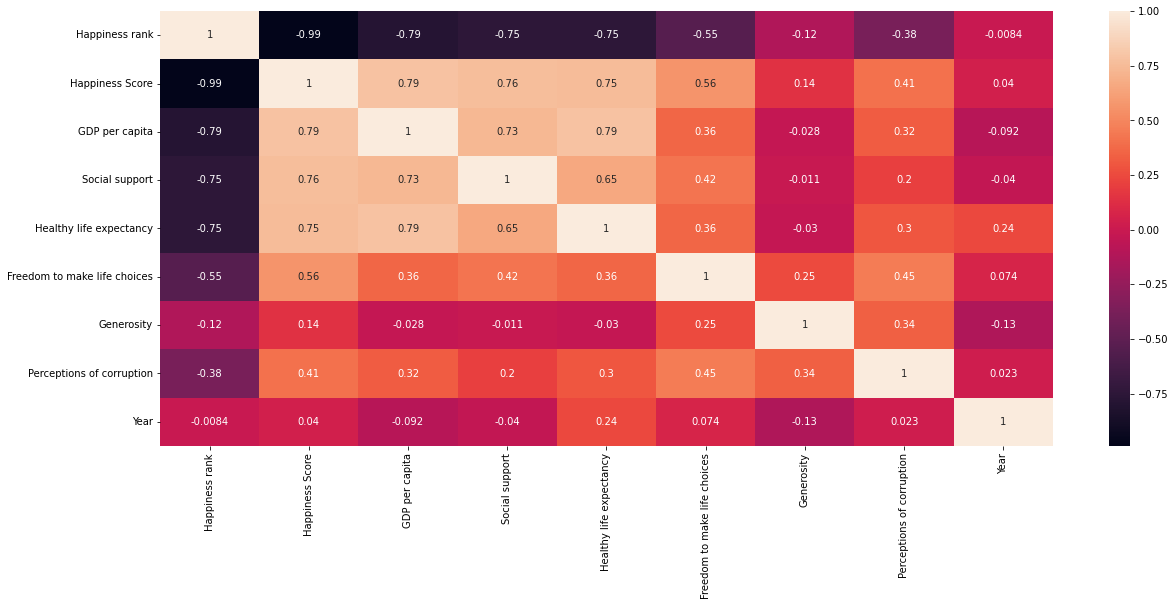

In [26]:
# find the correlation between features
ana.dataAnalysis.get_seaborn_heatmap(df=world_happiness_data)

### 10. Slicing Data of a particular column value (like year, month, filter values depending on the categorical data)


In [27]:
years = [2017,2018,2019,2020]
world_happiness_data_rank1 = world_happiness_data[(world_happiness_data['Year'].isin(years)) & 
                                                  (world_happiness_data['Happiness rank']== 1)]
world_happiness_data_rank1

Country  Happiness rank  Happiness Score  GDP per capita  Social support  \
0     Norway               1           7.5370        1.616463        1.533524   
155  Finland               1           7.6320        1.305000        1.592000   
310  Finland               1           7.7690        1.340000        1.587000   
466  Finland               1           7.8087        1.285190        1.499526   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   0.796667                      0.635423    0.362012   
155                 0.874000                      0.681000    0.202000   
310                 0.986000                      0.596000    0.153000   
466                 0.961271                      0.662317    0.159670   

     Perceptions of corruption  Year  
0                     0.315964  2017  
155                   0.393000  2018  
310                   0.393000  2019  
466                   0.477857  2020

In [28]:
# groupying_df 
grouping_df = world_happiness_data_rank1.groupby(['Year','Country'])['Happiness Score'].sum().sort_values(ascending=False)
grouping_df

Year  Country
2020  Finland    7.8087
2019  Finland    7.7690
2018  Finland    7.6320
2017  Norway     7.5370
Name: Happiness Score, dtype: float64

In [29]:
fig = px.bar(world_happiness_data_rank1, x='Year', y='Happiness Score',
                 hover_data=['Country','Happiness Score'],color='Country',title='Happiness Rank 1 Countries for year 2017, 2018, 2019, 2020')
fig.show()

### creating own packages and using it

In [30]:
# used module dataoperation
countries = world_happiness_data[world_happiness_data['Year'] == 2019]
top_countries =  cln.dataCleaning.get_larget(5, countries, 'Happiness rank')
top_countries

Country  Happiness rank  Happiness Score  GDP per capita  \
310      Finland               1            7.769           1.340   
311      Denmark               2            7.600           1.383   
312       Norway               3            7.554           1.488   
313      Iceland               4            7.494           1.380   
314  Netherlands               5            7.488           1.396   

     Social support  Healthy life expectancy  Freedom to make life choices  \
310           1.587                    0.986                         0.596   
311           1.573                    0.996                         0.592   
312           1.582                    1.028                         0.603   
313           1.624                    1.026                         0.591   
314           1.522                    0.999                         0.557   

     Generosity  Perceptions of corruption  Year  
310       0.153                      0.393  2019  
311       0.252                      0.410  2019  
312       0.271                      0.341  2019  
313       0.354                      0.118  2019  
314       0.322                      0.298  2019

In [31]:
countries_2018 = world_happiness_data[world_happiness_data['Year'] == 2018]
countries_2018 =  cln.dataCleaning.get_larget(5, countries_2018, 'Happiness rank')
countries_2018

Country  Happiness rank  Happiness Score  GDP per capita  \
155      Finland               1            7.632           1.305   
156       Norway               2            7.594           1.456   
157      Denmark               3            7.555           1.351   
158      Iceland               4            7.495           1.343   
159  Switzerland               5            7.487           1.420   

     Social support  Healthy life expectancy  Freedom to make life choices  \
155           1.592                    0.874                         0.681   
156           1.582                    0.861                         0.686   
157           1.590                    0.868                         0.683   
158           1.644                    0.914                         0.677   
159           1.549                    0.927                         0.660   

     Generosity  Perceptions of corruption  Year  
155       0.202                      0.393  2018  
156       0.286                      0.340  2018  
157       0.284                      0.408  2018  
158       0.353                      0.138  2018  
159       0.256                      0.357  2018

In [32]:
countries_2017 = world_happiness_data[world_happiness_data['Year'] == 2017]
countries_2017 =  cln.dataCleaning.get_larget(5, countries_2017, 'Happiness rank')
countries_2017

Country  Happiness rank  Happiness Score  GDP per capita  \
0       Norway               1            7.537        1.616463   
1      Denmark               2            7.522        1.482383   
2      Iceland               3            7.504        1.480633   
3  Switzerland               4            7.494        1.564980   
4      Finland               5            7.469        1.443572   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0        1.533524                 0.796667                      0.635423   
1        1.551122                 0.792566                      0.626007   
2        1.610574                 0.833552                      0.627163   
3        1.516912                 0.858131                      0.620071   
4        1.540247                 0.809158                      0.617951   

   Generosity  Perceptions of corruption  Year  
0    0.362012                   0.315964  2017  
1    0.355280                   0.400770  2017  
2    0.475540                   0.153527  2017  
3    0.290549                   0.367007  2017  
4    0.245483                   0.382612  2017

### 13. Select a slice or part of the data and display.

In [33]:
top_countries.iloc[3:5, 0:4]

Country  Happiness rank  Happiness Score  GDP per capita
313      Iceland               4            7.494           1.380
314  Netherlands               5            7.488           1.396

### 14. Use conditions and segregate the data based on the condition (like show data of a feature(column) >,<,= a number)


In [34]:
highest_score_countries_2018 = ana.dataAnalysis.get_highest_happiness_score_by_year(df=world_happiness_data,col_lst=['Year','Country','Happiness Score','Happiness rank'],by_col=['Happiness Score','Year'],year=2018,num_rows=5)
highest_score_countries_2018

Year      Country  Happiness Score  Happiness rank
155  2018      Finland            7.632               1
156  2018       Norway            7.594               2
157  2018      Denmark            7.555               3
158  2018      Iceland            7.495               4
159  2018  Switzerland            7.487               5

In [35]:
highest_score_countries_2017 = ana.dataAnalysis.get_highest_happiness_score_by_year(df=world_happiness_data,col_lst=['Year','Country','Happiness Score','Happiness rank'],by_col=['Happiness Score','Year'],year=2017,num_rows=5)
print(highest_score_countries_2017)

ana.dataAnalysis.get_plotly_pie_chart(grouping_df=highest_score_countries_2017,names='Country',values='Happiness Score',color='Country',
                                    hover_col_lst=['Country','Happiness Score'],graph_title='Highest Happiness Score in 2017' )

   Year      Country  Happiness Score  Happiness rank
0  2017       Norway            7.537               1
1  2017      Denmark            7.522               2
2  2017      Iceland            7.504               3
3  2017  Switzerland            7.494               4
4  2017      Finland            7.469               5


In [36]:
highest_score_countries_2018 = ana.dataAnalysis.get_highest_happiness_score_by_year(df=world_happiness_data,col_lst=['Year','Country','Happiness Score'],by_col=['Happiness Score','Year'],year=2018,num_rows=5)
print(highest_score_countries_2018)

fig = px.bar(highest_score_countries_2018, x='Country', y='Happiness Score',
                 hover_data=['Country','Happiness Score'],color='Country',title='Highest Happiness Score in 2018')
fig.show()

     Year      Country  Happiness Score
155  2018      Finland            7.632
156  2018       Norway            7.594
157  2018      Denmark            7.555
158  2018      Iceland            7.495
159  2018  Switzerland            7.487


In [37]:
highest_score_countries_2019 = ana.dataAnalysis.get_highest_happiness_score_by_year(df=world_happiness_data,col_lst=['Year','Country','Happiness Score'],by_col=['Happiness Score','Year'],year=2019,num_rows=5)
print(highest_score_countries_2019)


ana.dataAnalysis.get_plotly_pie_chart(grouping_df=highest_score_countries_2019,names='Country',values='Happiness Score',color='Country',
                                    hover_col_lst=['Country','Happiness Score'],graph_title='Highest Happiness Score in 2019' )


     Year      Country  Happiness Score
310  2019      Finland            7.769
311  2019      Denmark            7.600
312  2019       Norway            7.554
313  2019      Iceland            7.494
314  2019  Netherlands            7.488


In [38]:
highest_score_countries_2020 = ana.dataAnalysis.get_highest_happiness_score_by_year(df=world_happiness_data,col_lst=['Year','Country','Happiness Score'],by_col=['Happiness Score','Year'],year=2020,num_rows=5)
print(highest_score_countries_2020)


fig = px.bar(highest_score_countries_2020, x='Country', y='Happiness Score',
                 hover_data=['Country','Happiness Score'],color='Country',title='Highest Happiness Score in 2020')
fig.show()

     Year      Country  Happiness Score
466  2020      Finland           7.8087
467  2020      Denmark           7.6456
468  2020  Switzerland           7.5599
469  2020      Iceland           7.5045
470  2020       Norway           7.4880


### Pairplot : visualize the correlation between variables

<Figure size 1440x576 with 0 Axes>

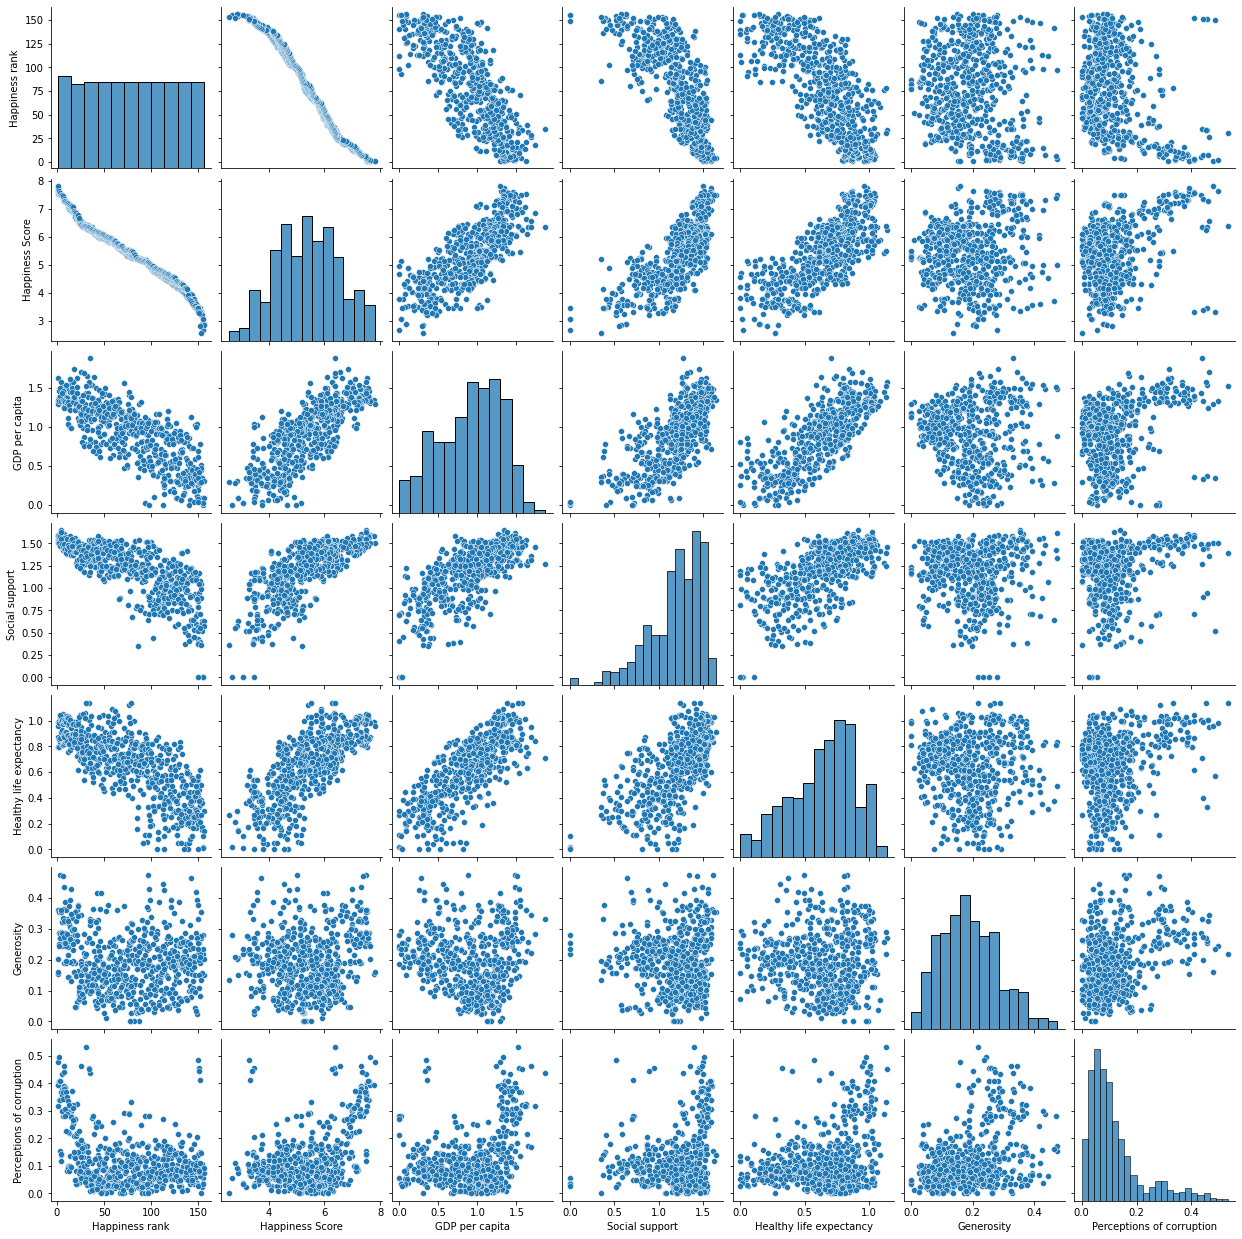

In [59]:
# pairplot 
ana.dataAnalysis.get_pairplot(df=world_happiness_data,cols=["Happiness rank","Happiness Score","GDP per capita","Social support","Healthy life expectancy","Generosity","Perceptions of corruption"]);

### Conclusion : 
* Happiness score and GDP per capita is Positive co-related 
* Social and support and GDP per capita is Positive co-related. 

### Use conditions and segregate the data based on the condition (like show data of a feature(column) >,<,= a number)


In [40]:
## Use conditions and segregate the data based on the condition (like show data of a feature(column) >,<,= a number)
happiness_score = world_happiness_data[(world_happiness_data['Year'] == 2020)]
min_happiness_score_2018 = min(happiness_score['Happiness Score'])
min_happiness_score_2018

2.566900015

In [41]:
# Get all the countries whoes happiness_score is less than min_happiness_score_2020 in 2020
happiness_score_2020 = world_happiness_data[(world_happiness_data['Year'] == 2020) & 
                                            (world_happiness_data['Happiness Score'] > min_happiness_score_2018)]

happiness_score_2020

Country  Happiness rank  Happiness Score  \
466                   Finland               1           7.8087   
467                   Denmark               2           7.6456   
468               Switzerland               3           7.5599   
469                   Iceland               4           7.5045   
470                    Norway               5           7.4880   
..                        ...             ...              ...   
613                  Tanzania             148           3.4762   
614  Central African Republic             149           3.4759   
615                    Rwanda             150           3.3123   
616                  Zimbabwe             151           3.2992   
617               South Sudan             152           2.8166   

     GDP per capita  Social support  Healthy life expectancy  \
466        1.285190        1.499526                 0.961271   
467        1.326949        1.503449                 0.979333   
468        1.390774        1.472403                 1.040533   
469        1.326502        1.547567                 1.000843   
470        1.424207        1.495173                 1.008072   
..              ...             ...                      ...   
613        0.457163        0.872675                 0.442678   
614        0.041072        0.000000                 0.000000   
615        0.343243        0.522876                 0.572383   
616        0.425564        1.047835                 0.375038   
617        0.289083        0.553279                 0.208809   

     Freedom to make life choices  Generosity  Perceptions of corruption  Year  
466                      0.662317    0.159670                   0.477857  2020  
467                      0.665040    0.242793                   0.495260  2020  
468                      0.628954    0.269056                   0.407946  2020  
469                      0.661981    0.362330                   0.144541  2020  
470                      0.670201    0.287985                   0.434101  2020  
..                            ...         ...                        ...   ...  
613                      0.509343    0.271541                   0.203881  2020  
614                      0.292814    0.253513                   0.028265  2020  
615                      0.604088    0.235705                   0.485542  2020  
616                      0.377405    0.151349                   0.080929  2020  
617                      0.065609    0.209935                   0.111157  2020  

[152 rows x 10 columns]

### 11. Representing data in matrix form.

In [42]:
top_countries_matrix = top_countries.to_numpy()
print('Most happiest country:', top_countries_matrix[0][0])
print('Details of most happiest country', top_countries_matrix[0])


Most happiest country: Finland
Details of most happiest country ['Finland' 1 7.769 1.34 1.587 0.986 0.596 0.153 0.393 2019]


In [43]:
# Upload data to Numerical Python (NumPy) - matrix form
rank1_country_features = np.genfromtxt('rank1_data.csv', delimiter=',', dtype= None)
print(rank1_country_features)

[[1.61646318 0.7966665  0.31596383]
 [1.305      0.874      0.393     ]
 [1.34       0.986      0.393     ]
 [1.28518951 0.96127141 0.47785726]]


### 12. Upload data to Numerical Python (NumPy)

In [44]:
# Convert dataframe to csv 
#header = ["GDP per capita", "Healthy life expectancy", "Perceptions of corruption"]
world_happiness_data_rank1.to_csv('rank1_data.csv', columns=['GDP per capita', 'Healthy life expectancy', "Perceptions of corruption"], header=False, index=False)

### 18. Write your own functions and handle exceptions in the functions.

In [45]:
# passing arguments to this function :
args = world_happiness_data['Happiness Score']
cln.dataCleaning.slice_data(3,*args)
cln.dataCleaning.slice_data(1000,*args)

Value at index : 3 = 7.49399995803833
IndexError Occurred


In [46]:
world_happiness_data

Country  Happiness rank  Happiness Score  \
0                      Norway               1           7.5370   
1                     Denmark               2           7.5220   
2                     Iceland               3           7.5040   
3                 Switzerland               4           7.4940   
4                     Finland               5           7.4690   
..                        ...             ...              ...   
614  Central African Republic             149           3.4759   
615                    Rwanda             150           3.3123   
616                  Zimbabwe             151           3.2992   
617               South Sudan             152           2.8166   
618               Afghanistan             153           2.5669   

     GDP per capita  Social support  Healthy life expectancy  \
0          1.616463        1.533524                 0.796667   
1          1.482383        1.551122                 0.792566   
2          1.480633        1.610574                 0.833552   
3          1.564980        1.516912                 0.858131   
4          1.443572        1.540247                 0.809158   
..              ...             ...                      ...   
614        0.041072        0.000000                 0.000000   
615        0.343243        0.522876                 0.572383   
616        0.425564        1.047835                 0.375038   
617        0.289083        0.553279                 0.208809   
618        0.300706        0.356434                 0.266052   

     Freedom to make life choices  Generosity  Perceptions of corruption  Year  
0                        0.635423    0.362012                   0.315964  2017  
1                        0.626007    0.355280                   0.400770  2017  
2                        0.627163    0.475540                   0.153527  2017  
3                        0.620071    0.290549                   0.367007  2017  
4                        0.617951    0.245483                   0.382612  2017  
..                            ...         ...                        ...   ...  
614                      0.292814    0.253513                   0.028265  2020  
615                      0.604088    0.235705                   0.485542  2020  
616                      0.377405    0.151349                   0.080929  2020  
617                      0.065609    0.209935                   0.111157  2020  
618                      0.000000    0.135235                   0.001226  2020  

[619 rows x 10 columns]

### 19. Use of *arg and **kwargs.

In [47]:
# Use of **kwargs
# Get country based on search critearia passed

def get_country_deatils(**kwargs):
    print(kwargs)
    result_data = world_happiness_data
    for key, value in kwargs.items():
        result_data = result_data[(result_data[key] == value)]
     
    return result_data

In [48]:
# calling function
kwargs = {"Generosity" : 0.217, "Social support" : 0.711, "Perceptions of corruption" : 0.411}
get_country_deatils(**kwargs)

{'Generosity': 0.217, 'Social support': 0.711, 'Perceptions of corruption': 0.411}


Country  Happiness rank  Happiness Score  GDP per capita  Social support  \
461  Rwanda             152            3.334           0.359           0.711   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
461                    0.614                         0.555       0.217   

     Perceptions of corruption  Year  
461                      0.411  2019

### SQL Lite Integration :

#### Create a Connection to DB

In [49]:
# Integration of SQL and Python
connection_string = sqllt.connect('sqllite integration DB/world_happiness_correlation.db') 

In [50]:
# check if Connection is successful
print(connection_string.total_changes)

0


#### Create Table using Sqlite :

In [52]:
cursor = connection_string.cursor()
# cursor.execute("CREATE TABLE world_happiness_correltn (happiness_rank INTEGER, happiness_score REAL, gdp_per_capita REAL, healthy_life_expectancy REAL)")

#### Insert data into Table :

In [53]:
# insert data to table
cursor.execute("INSERT INTO world_happiness_correltn VALUES (1, .99, .8, .75)")

#### Retriving data from Sqlite Table

In [54]:
# check for inserted values
with connection_string:
    data = connection_string.execute("SELECT * FROM world_happiness_correltn")
    for row in data:
        print(row)

(1, 0.99, 0.8, 0.75)
(1, 0.99, 0.8, 0.75)
(1, 0.99, 0.8, 0.75)
(1, 0.99, 0.8, 0.75)


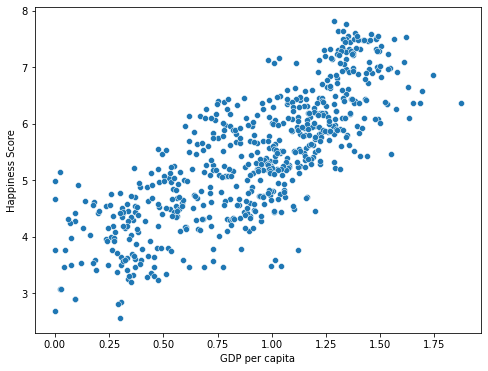

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GDP per capita',y='Happiness Score',data=world_happiness_data);

#### Conclude : GDP per capita higher hapiness score is higher. It means developed country are more happy. 

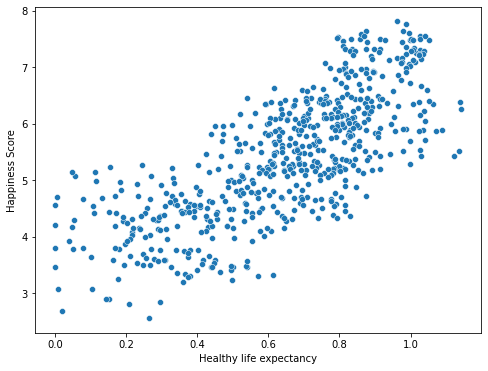

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Healthy life expectancy',y='Happiness Score',data=world_happiness_data);

#### Conclude : Based on above, we can say that Healthly Life expectancy increseing hapiness score increases. 

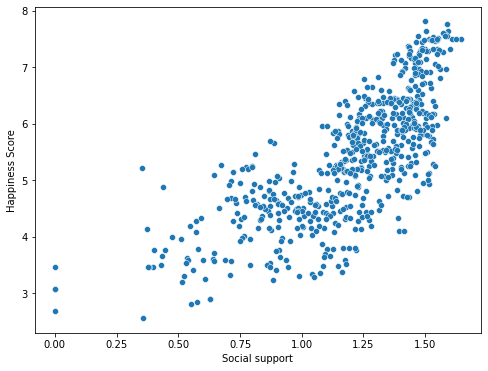

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Social support',y='Happiness Score',data=world_happiness_data);

#### Conclude : social support has infuluence in happiness. 

### Thank You!